In [1]:
import pandas as pd
import numpy as np
import math
%matplotlib inline

In [2]:
# サイクルあたりのステップ数
steps_per_cycle = 50
# 生成するサイクル数
number_of_cycles = 100

In [3]:
df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
df.head()

,t
0,0
1,1
2,2
3,3
4,4


In [4]:
df["sin_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)))

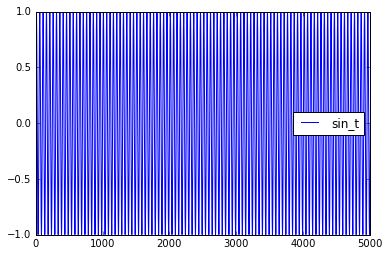

In [5]:
df[["sin_t"]].plot()

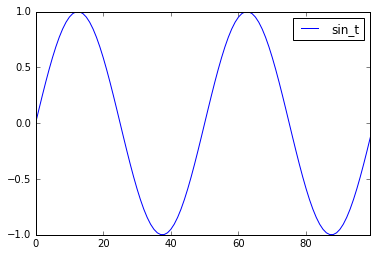

In [6]:
df[["sin_t"]].head(steps_per_cycle * 2).plot()

In [7]:
df["sin_t+1"] = df["sin_t"].shift(-1)

In [8]:
df.tail()

,t,sin_t,sin_t+1
4996,4996,-4.817537e-01,-3.681246e-01
4997,4997,-3.681246e-01,-2.486899e-01
4998,4998,-2.486899e-01,-1.253332e-01
4999,4999,-1.253332e-01,3.928773e-15
5000,5000,3.928773e-15,NaN


In [9]:
df.dropna(inplace=True)
df.tail()

,t,sin_t,sin_t+1
4995,4995,-0.587785,-4.817537e-01
4996,4996,-0.481754,-3.681246e-01
4997,4997,-0.368125,-2.486899e-01
4998,4998,-0.248690,-1.253332e-01
4999,4999,-0.125333,3.928773e-15


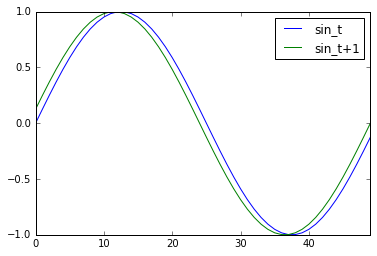

In [10]:
df[["sin_t", "sin_t+1"]].head(steps_per_cycle).plot()

In [11]:
matrix = df[["sin_t", "sin_t+1"]].as_matrix()
matrix

array([[  0.00000000e+00,   1.25333234e-01],
       [  1.25333234e-01,   2.48689887e-01],
       [  2.48689887e-01,   3.68124553e-01],
       ..., 
       [ -3.68124553e-01,  -2.48689887e-01],
       [ -2.48689887e-01,  -1.25333234e-01],
       [ -1.25333234e-01,   3.92877345e-15]])

In [12]:
np.save("normal.npy", matrix)